# Converting our data into a Dataframe

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #test

df - pd.read_csv('world-happiness-report.csv', header=1,delimiter=',')

df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


# --------------------------------------------------------

# Question 1: Compare the two countries with the highest and lowest life ladder scores and determine which factors contribute the most to which

# Find the average life ladder of all countries over all the years

In [9]:
ladderAverage = df[["Life Ladder"]].mean()
ladderAverage

Life Ladder    5.466705
dtype: float64

# The country with the highest Life Ladder

In [164]:
##df['Life Ladder'].max()
ladderMax = df.iloc[[df['Life Ladder'].argmax()]]
ladderMax

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
449,Denmark,2005,8.019,10.851,0.972,69.6,0.971,NaN,0.237,0.86,0.154


# The country with the lowest Life Ladder

In [153]:
ladderMin = df.iloc[[df['Life Ladder'].argmin()]]
ladderMin

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
11,Afghanistan,2019,2.375,7.697,0.42,52.4,0.394,-0.108,0.924,0.351,0.502


# Combine the two into a single dataframe

In [154]:
#df_all = pd.concat([df_min,df_max], axis='columns', keys=['Country name'])
#df_all

#combines selected rows from different dataframes
#df_min.head(1).combine_first(df_max.tail(2))

ladderCompare = pd.concat([ladderMin,ladderMax])
ladderCompare

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
449,Denmark,2005,8.019,10.851,0.972,69.6,0.971,NaN,0.237,0.860,0.154


# Label each row as the necessary country position

In [155]:
#we do this so we're able to run the comparison on it next
firstCountry = ladderCompare.iloc[0]
firstCountry

Country name                        Afghanistan
year                                       2019
Life Ladder                               2.375
Log GDP per capita                        7.697
Social support                             0.42
Healthy life expectancy at birth           52.4
Freedom to make life choices              0.394
Generosity                               -0.108
Perceptions of corruption                 0.924
Positive affect                           0.351
Negative affect                           0.502
Name: 11, dtype: object

In [156]:
secondCountry = ladderCompare.iloc[1]
secondCountry

Country name                        Denmark
year                                   2005
Life Ladder                           8.019
Log GDP per capita                   10.851
Social support                        0.972
Healthy life expectancy at birth       69.6
Freedom to make life choices          0.971
Generosity                              NaN
Perceptions of corruption             0.237
Positive affect                        0.86
Negative affect                       0.154
Name: 449, dtype: object

# Find where the 1st country in lower than the 2nd

In [160]:
ladderCompare[ladderCompare.columns[firstCountry < secondCountry]]

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Positive affect
11,Afghanistan,2.375,7.697,0.420,52.4,0.394,0.351
449,Denmark,8.019,10.851,0.972,69.6,0.971,0.860


# Find where the 1st country is higher than the 2nd

In [158]:
# outputs where the first country is higher than the second country
firstCountryHigh = ladderCompare[ladderCompare.columns[firstCountry > secondCountry]]

# the output above however doesn't display the country name, we need to 
## add that column so the visual dataframe is concise

# variable the country column
df_country = df[["Country name"]]

# insert the country column into the firstCountryHigh dataframe above. we
## put 0 as we want the country to be the first thing displayed
firstCountryHigh.insert(0, 'Country name', df_country)
firstCountryHigh

,Country name,year,Perceptions of corruption,Negative affect
11,Afghanistan,2019,0.924,0.502
449,Denmark,2005,0.237,0.154


In [ ]:
# from the results we can see that Afghanistan, the lowest life ladder
# score country excels at it's people thinking their country is very 
# corrupted and experiencing negative emotions on a daily basis. however
# things they should excel at like GDP/Social Support/Positive Affect, 
# they completely lack in. This shows us that for Afghanistan, the people
# feel very uneasy about the day to day things in their life overall. 
# Usually a country will lack in certain departments and excel/manage 
# in others. But for this one to be completely lacking in everything 
# compared to the highest life ladder country, it puts into perspective
# where Afghanistan falls short and where Denmark excel. It's also a sign
# as to how these countries could improve

# Output the highest/lowest life ladder scores (for unit testing)

In [176]:
ladderMaxValue = ladderMax.iloc[0]['Life Ladder']
print("Ladder Max: " + str(ladderMaxValue))

ladderMinValue = ladderMin.iloc[0]['Life Ladder']
print("Ladder Min: " + str(ladderMaxValue))

Ladder Max: 8.019
Ladder Min: 8.019


# --------------------------------------------------------

# Question 2: Compare Finlands last 3 years to each other and see if there's any relationships among the determining factors of happiness of a country

# Extract the Finland data from years 2018 to 2020

In [195]:
finland = df[df['Country name'].str.match('Finland')].loc[df['year']>=2018]
finland

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
561,Finland,2018,7.858,10.783,0.962,71.9,0.938,-0.127,0.199,0.782,0.182
562,Finland,2019,7.780,10.792,0.937,72.0,0.948,-0.052,0.195,0.755,0.181
563,Finland,2020,7.889,10.750,0.962,72.1,0.962,-0.116,0.164,0.744,0.193


# Graph the three years

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

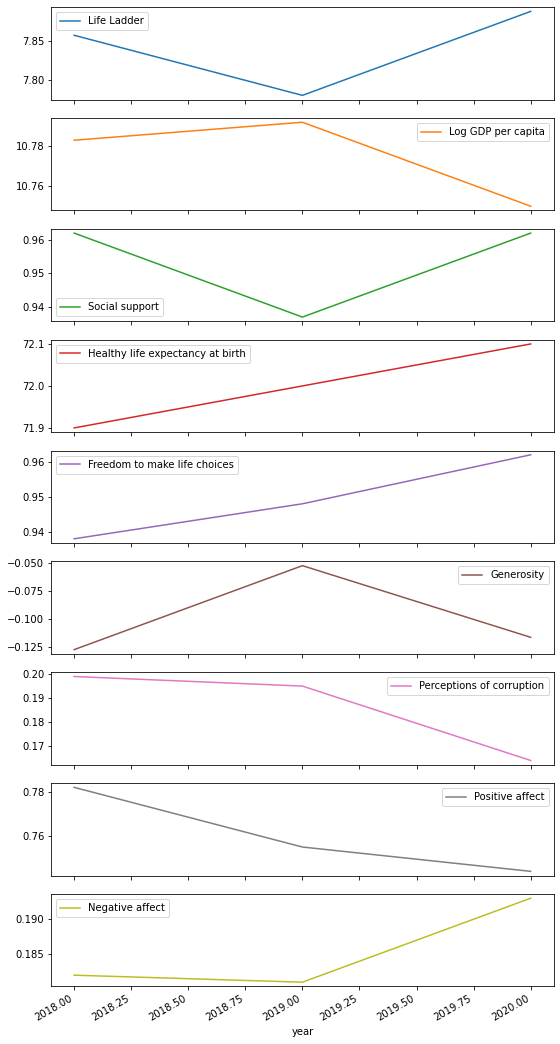

In [196]:
finland.set_index('year').plot(subplots=True, figsize=(9,20))

In [ ]:
## by dividing the the different aspects (columns) of the finland country
##we're able to visually see the relationships and how they affect one 
###for this country specifically. we can see from the graph most
####importantly that 2018 seems to be a turning block for this country 

# After 2018, the people in Finland started to be more positive towards 
## their country. We can see that certain aspects have certain trats. When
### aspects like generosity increases, so does GDP per capita. This means
#### that as more people have more money, they tend to share more it as 
##### the polling question for Generosity is "Have you donated money to 
###### charity in the last month?"

# It also shows why when Generosity decreases, so does GDP as less money
## in people's pocket, means least money to give out.

##########################################################################

# However, we can see that the positive affect was still decreasing, which
## means that people weren't feeling too many signs of happiness (like 
### laughter, enjoyment, etc.) the day before. So it must be linked 
#### somewhere. We can't see an exact correlation of Positive Affect to 
##### to anything else, but we can notice that after 2018 it started to 
###### decrease more slightly while Negativie Affect took a sharp increase
##### meaning more people shifted to Negative emotions. So by consensus,
#### you would expect certain areas to increase also, such as Perception
### of Corruption, but that's wrong; it was on a sharp decline. So now we 
## can not that Corruption doesn't play much a part in how people feel in
# in general, when they're GDP fell, Perception still fell. 

# At this point, it's hard to give a straight answer as there's not much 
# correlation between the people and government to pinpoint things. The 
# people's Social Support sharply decreased and then sharply increased while
# their perception still fell steadily then sharply over the 3 years. Their
# feelings arent necesssarily stemming from the government, we can declare
# that as they're feelings on Freedom to Make Choices still increased 
# despite the fall in Social Support from 2018 to 2019. However, what i did
# noticed was that Social Support and GDP we're almost exactly inverse to 
# each other. It's likely this was the case as people in life tend to rely
# on family and friends when they're financially struggling. When GDP was 
# high, Social Support was low because people didn't really care if they had
# someone to rely on or not, they had money to care for themselves. But when
# their money fell, they became dependent on others, showing them how many
# people they actually do have to support them in different times.

# --------------------------------------------------------

# Unit Testing

# Question 1

In [238]:
# this unit test makes sure that the life ladder scores are compared
## properly and the average was calculated correctly
def test_lifeLadderScores():
    assert ((ladderMinValue <= ladderMaxValue).all() & (ladderMinValue <= ladderAverage).all() & (ladderMaxValue >= ladderAverage).all()), 'Invalid Life Ladder Comparison!'
    print('lifeLadderScores Function passed!')
    
test_lifeLadderScores()

# the test above makes sure the calculation follow the correct criteria
# Life Ladder Min value must be smaller than the Max Value and Average
# Life Ladder Max value must be greater than the Min value and Average
# Average must fall in between (above two qualifications confirm that)

lifeLadderScores Function passed!


# Question 2

In [257]:
# this commented code is only used in case we run this section of code
## more than once
# yearsList.clear()

# this unit test makes sure that the extracted years for comparing Finland
## were correctly 2018 - 2020
def test_extractedYears():
    n = 3
    x = 0
    while x < n:
        years = finland.iloc[x]['year']
        yearsList.append(years)
        x+=1

    x = 0
    while x < n:
        assert ((yearsList[x] >= 2018) & (yearsList[x] <= 2020)), "Incorrect Years Extracted"
        print("Correct Years Extracted")
        x+=1
    
test_extractedYears()

# the test above makes sure that the year extractions follow the criteria
# Years must be above or equal to 2018
# Years must be below or equal to 2020

Correct Years Extracted
Correct Years Extracted
Correct Years Extracted


Is there an overall correlation between "GDP per capita" and "positive affect"?
Weak Correlation 0.35129324893340685


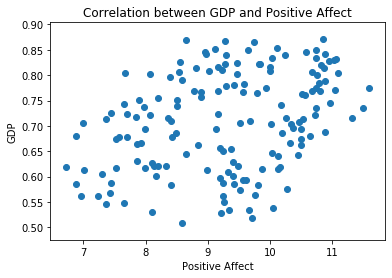

0.35129324893340685

In [10]:
#Question 3.)
#Is there an overall correlation between "GDP per capita" and "positive affect"? In other words,
#does money buy happiness?
def doesMoneyBuyHappiness(df,showChart=False):
    countryGDP = df.groupby(['Country name']).mean()['Log GDP per capita'] #get average gdp of all countries for all years
    countryPositive = df.groupby(['Country name']).mean()['Positive affect'] #get average happiness of all countries for all years
    r = countryGDP.corr(countryPositive) #calculate correlation coefficient between the two columns
    
    #based on r value determine whether this is shows a strong, moderate, or weak correlation.
    if showChart: 
        print('Is there an overall correlation between "GDP per capita" and "positive affect"?')
        if r > .7:
            print('Strong Correlation',r)
        elif .69 > r > .5:
            print('Moderate Correlation',r)
        elif .49 > r:
            print('Weak Correlation',r)
        
    #display scatterplot of all data points to better visualize correlation
        plt.scatter(countryGDP,countryPositive)
        plt.title('Correlation between GDP and Positive Affect')
        plt.xlabel('Positive Affect')
        plt.ylabel('GDP')
        plt.show()
    
    return r #return r value

doesMoneyBuyHappiness(df,showChart=True)
#from these calculations we can see that there is a weak positive correlation between a country's GDP and it's positive affect rating.

Which year saw the biggest improvement in global happiness?
2019


2019

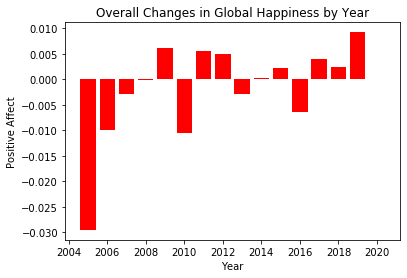

In [5]:
#Question 2.)
#Which year saw the biggest improvement in global happiness?
def happiestYear(df,showChart=False):
    byYear = df.groupby(['year']).mean()['Positive affect'] #get average overall positive affect for each year
    years = [] #create empty list to get all years involved in dataset
    [years.append(x) for x in list(df['year']) if x not in years] #list comprehension to remove duplicate years from list
    years.sort() #sort list from lowest to highest

    position = 0 #assign initial position to be incremented
    yearCount = 2005 #assign initial year to be incremented
    yearList = list(byYear) #convert df to list
    differences = [] #create empty list
    getChange = lambda num : num + 1 if num < 15 else num #lambda function to increment numbers
    for year in yearList:
        difference = yearList[getChange(position)]-year #check for difference in "positive affect"
        differences.append(difference) #add differences to list
        position = getChange(position) #increment
        yearCount = getChange(yearCount) #increment
    
    biggestImprovement = max(differences) #find biggest improvement
    differencePosition = differences.index(biggestImprovement) #get index of that number
    happyYear = years[differencePosition] #find which year had that improvement!
    
    #display information via barchart
    if showChart:
        print('Which year saw the biggest improvement in global happiness?')
        print(happyYear)
    
        plt.bar(years,differences, color='red')
        plt.title('Overall Changes in Global Happiness by Year')
        plt.xlabel('Year')
        plt.ylabel('Positive Affect')

    return happyYear

happiestYear(df,showChart=True)

In [6]:
#unit testing!

#test doesMoneyBuyHappiness function by asserting that the output is a number (float or int) between -1 and 1, otherwise gives
#assertion error
def test_doesMoneyBuyHappiness(df):
    r = float(doesMoneyBuyHappiness(df))
    assert -1 <= r <= 1, 'Invalid Correlation Coefficient...'
    print('doesMoneyBuyHappiness Function passed!')
    
#test happiestYear function by asserting that the output is a valid year (between 2005 and 2020), otherwise gives assertion error.
def test_happiestYear(df):
    year = int(happiestYear(df))
    assert 2005 <= year <= 2020, 'Invalid Year...'
    print('happiestYear Function passed!')
    
test_doesMoneyBuyHappiness(df)
test_happiestYear(df)

doesMoneyBuyHappiness Function passed!
happiestYear Function passed!


In [12]:
# Question 5: Which country has the highest “freedom”? Which country has the lowest “freedom”? How is this correlated to "corruption"?
# Find country with highest freedom score
freedomMax = df.iloc[[df['Freedom to make life choices'].argmax()]]
freedomMax

C:\Users\brand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1876,Uzbekistan,2017,6.421,8.782,0.942,64.8,0.985,0.123,0.465,0.839,0.203


In [13]:
# Find country with lowest freedom score
freedomMin = df.iloc[[df['Freedom to make life choices'].argmin()]]
freedomMin

C:\Users\brand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
194,Bosnia and Herzegovina,2009,4.963,9.296,0.735,66.48,0.258,-0.026,0.959,0.572,0.39


In [14]:
# Combine highest and lowest freedom scores
maxAndMinFreedom = pd.concat([freedomMax, freedomMin])

maxAndMinFreedom

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1876,Uzbekistan,2017,6.421,8.782,0.942,64.80,0.985,0.123,0.465,0.839,0.203
194,Bosnia and Herzegovina,2009,4.963,9.296,0.735,66.48,0.258,-0.026,0.959,0.572,0.390


In [15]:
# Find country with highest corruption score
corruptionMax = df.iloc[[df['Perceptions of corruption'].argmax()]]
corruptionMax

C:\Users\brand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
713,Hungary,2010,4.725,10.106,0.896,65.6,0.514,-0.145,0.983,0.656,0.235


In [16]:
# Find country with lowest corruption score
corruptionMin = df.iloc[[df['Perceptions of corruption'].argmin()]]
corruptionMin

C:\Users\brand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1524,Singapore,2009,6.145,11.149,0.866,74.5,0.776,-0.075,0.035,0.5,0.208


In [17]:
# Combine highest and lowest corruption scores
maxAndMinCorruption = pd.concat([corruptionMax, corruptionMin])
maxAndMinCorruption

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
713,Hungary,2010,4.725,10.106,0.896,65.6,0.514,-0.145,0.983,0.656,0.235
1524,Singapore,2009,6.145,11.149,0.866,74.5,0.776,-0.075,0.035,0.500,0.208


In [18]:
# Create graph of all countries' freedom score and corruption score
freedomAndPerception = df[['Freedom to make life choices', 'Perceptions of corruption']]
freedomAndPerception

,Freedom to make life choices,Perceptions of corruption
0,0.718,0.882
1,0.679,0.850
2,0.600,0.707
3,0.496,0.731
4,0.531,0.776
5,0.578,0.823
6,0.509,0.871
7,0.389,0.881
8,0.523,0.793
9,0.427,0.954


Does A Countries "Freedom" Score Affect "Corruption" ?
Moderate Negative Correlation -0.5286286632774375


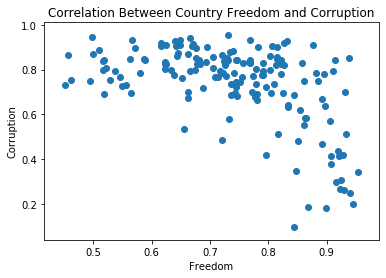

-0.5286286632774375

In [19]:
def freedomAndPerception(df,showChart=False):
    countryFreedom = df.groupby(['Country name']).mean()['Freedom to make life choices'] 
    countryCorruption = df.groupby(['Country name']).mean()['Perceptions of corruption']
    r = countryFreedom.corr(countryCorruption)
      #based on r value determine whether this is shows a strong, moderate, or weak positive or negative correlation.
    if showChart: 
        print('Does A Countries "Freedom" Score Affect "Corruption" ?')
        if r > .7:
            print('High Correlation',r)
        elif .69 > r > .5:
            print('Moderate Correlation',r)
        elif .49 > r:
            print('Moderate Negative Correlation',r)
        
    
        plt.scatter(countryFreedom,countryCorruption)
        plt.title('Correlation Between Country Freedom and Corruption')
        plt.xlabel('Freedom')
        plt.ylabel('Corruption')
        plt.show()
    
    return r 

freedomAndPerception(df,showChart=True)